In [1]:
from __future__ import division, print_function

import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
from IPython.display import display, Math, Latex

from salishsea_tools import (
    nc_tools,
    viz_tools,
)

In [2]:
%matplotlib inline

In [10]:
u_vel = nc.Dataset('/data/dlatorne/MEOPAR/SalishSea/nowcast/14aug15/SalishSea_1h_20150814_20150814_grid_U.nc')
v_vel = nc.Dataset('/data/dlatorne/MEOPAR/SalishSea/nowcast/14aug15/SalishSea_1h_20150814_20150814_grid_V.nc')
w_vel = nc.Dataset('/data/dlatorne/MEOPAR/SalishSea/nowcast/14aug15/SalishSea_1h_20150814_20150814_grid_W.nc')


In [11]:
nc_tools.show_dimensions(u_vel)

<type 'netCDF4._netCDF4.Dimension'>: name = 'depthu', size = 40

<type 'netCDF4._netCDF4.Dimension'>: name = 'y', size = 898

<type 'netCDF4._netCDF4.Dimension'>: name = 'x', size = 398

<type 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time_counter', size = 24

<type 'netCDF4._netCDF4.Dimension'>: name = 'tbnds', size = 2



In [12]:
nc_tools.show_variables(u_vel)

[u'depthu', u'nav_lat', u'nav_lon', u'time_counter', u'time_counter_bnds', u'u_wind_stress', u'vozocrtx']


In [13]:
nc_tools.show_variables(v_vel)

[u'depthv', u'nav_lat', u'nav_lon', u'time_counter', u'time_counter_bnds', u'v_wind_stress', u'vomecrty']


In [14]:
nc_tools.show_variables(w_vel)

[u'depthw', u'nav_lat', u'nav_lon', u'time_counter', u'time_counter_bnds', u'vovecrtz']


In [18]:
ugrid = u_vel.variables['vozocrtx']
vgrid = v_vel.variables['vomecrty']
zlevels = u_vel.variables['depthu']
timesteps = u_vel.variables['time_counter']

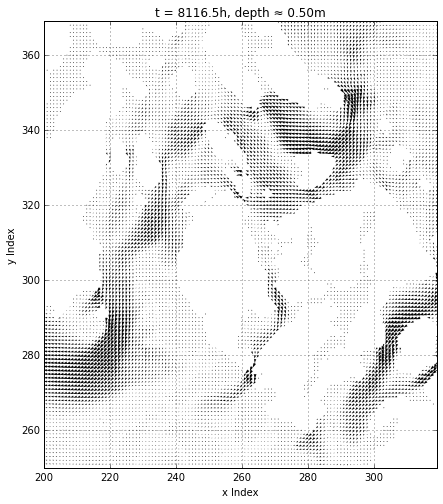

In [29]:
# Define the slice to plot
t, zlevel = 4, 0
y_slice = np.arange(250, 370)
x_slice = np.arange(200, 320)
# Slice and mask the arrays
ugrid_tzyx = np.ma.masked_values(ugrid[t, zlevel, y_slice, x_slice], 0)
vgrid_tzyx = np.ma.masked_values(vgrid[t, zlevel, y_slice, x_slice], 0)
# "Unstagger" the velocity values by interpolating them to the T-grid points
u_tzyx, v_tzyx = viz_tools.unstagger(ugrid_tzyx, vgrid_tzyx)
# Plot the velocity vectors
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)
ax.quiver(x_slice[1:], y_slice[1:], u_tzyx, v_tzyx)
# Axes limits and grid
ax.set_xlim(x_slice[0], x_slice[-1])
ax.set_ylim(y_slice[0], y_slice[-1])
ax.grid()
# Axes label and title
ax.set_xlabel('x Index')
ax.set_ylabel('y Index')
ax.set_title(u't = {t:.1f}h, depth \u2248 {d:.2f}{z.units}'.format(t=timesteps[t] / 3600, d=zlevels[zlevel], z=zlevels))

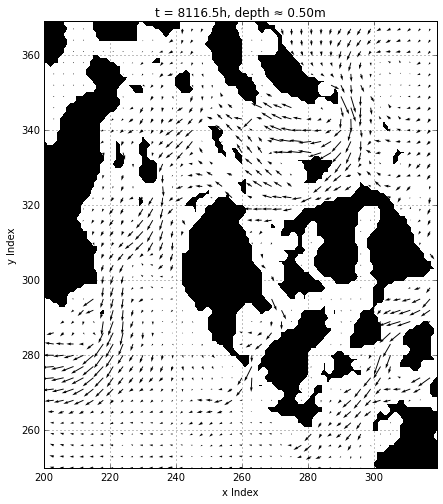

In [41]:
t, zlevel = 4, 0
y_slice = np.arange(250, 370)
x_slice = np.arange(200, 320)

ugrid_tzyx = np.ma.masked_values(ugrid[t, zlevel, y_slice, x_slice], 0)
vgrid_tzyx = np.ma.masked_values(vgrid[t, zlevel, y_slice, x_slice], 0)
u_tzyx, v_tzyx = viz_tools.unstagger(ugrid_tzyx, vgrid_tzyx)

arrow_step = 3
y_slice_a = y_slice[::arrow_step]
x_slice_a = x_slice[::arrow_step]

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)
ax.quiver(x_slice_a[:], y_slice_a[:], u_tzyx[::3,::3], v_tzyx[::3,::3])
viz_tools.plot_land_mask(ax, '/data/dlatorne/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc', xslice=x_slice, yslice=y_slice)

ax.set_xlim(x_slice[0], x_slice[-1])
ax.set_ylim(y_slice[0], y_slice[-1])
ax.grid()

ax.set_xlabel('x Index')
ax.set_ylabel('y Index')
ax.set_title(u't = {t:.1f}h, depth \u2248 {d:.2f}{z.units}'.format(t=timesteps[t] / 3600, d=zlevels[zlevel], z=zlevels))

In [42]:
bathy = nc.Dataset('/data/dlatorne/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')

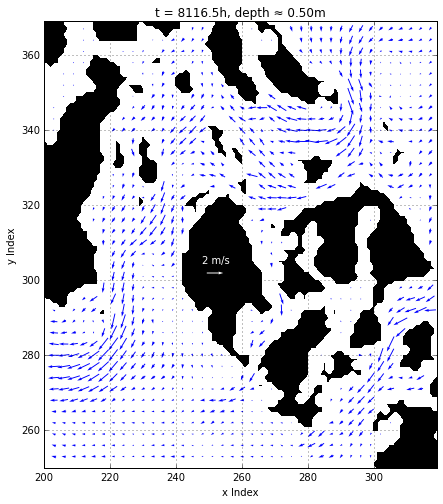

In [50]:
t, zlevel = 4, 0
y_slice = np.arange(250, 370)
x_slice = np.arange(200, 320)

arrow_step = 3
y_slice_a = y_slice[::arrow_step]
x_slice_a = x_slice[::arrow_step]

ugrid_tzyx = np.ma.masked_values(ugrid[t, zlevel, y_slice_a, x_slice_a], 0)
vgrid_tzyx = np.ma.masked_values(vgrid[t, zlevel, y_slice_a, x_slice_a], 0)
u_tzyx, v_tzyx = viz_tools.unstagger(ugrid_tzyx, vgrid_tzyx)

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)
quiver = ax.quiver(x_slice_a[1:], y_slice_a[1:], u_tzyx, v_tzyx, color='blue', pivot='mid')
viz_tools.plot_land_mask(ax, bathy, xslice=x_slice, yslice=y_slice)

ax.set_xlim(x_slice[0], x_slice[-1])
ax.set_ylim(y_slice[0], y_slice[-1])
ax.grid()

ax.set_xlabel('x Index')
ax.set_ylabel('y Index')
ax.set_title(u't = {t:.1f}h, depth \u2248 {d:.2f}{z.units}'.format(t=timesteps[t] / 3600, d=zlevels[zlevel], z=zlevels))
ax.quiverkey(quiver, 252, 302, 2, '2 m/s', coordinates='data', color='white', labelcolor='white')


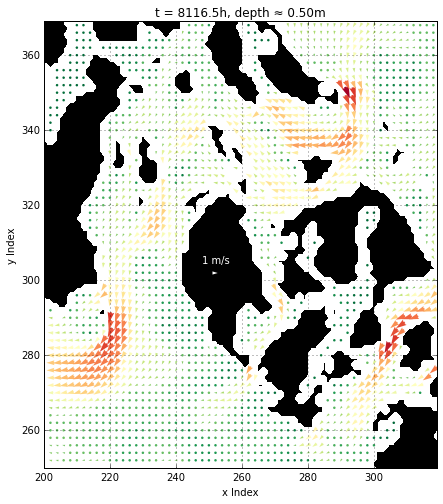

In [62]:
t, zlevel = 4, 0
y_slice = np.arange(250, 370)
x_slice = np.arange(200, 320)

arrow_step = 2
y_slice_a = y_slice[::arrow_step]
x_slice_a = x_slice[::arrow_step]

ugrid_tzyx = np.ma.masked_values(ugrid[t, zlevel, y_slice_a, x_slice_a], 0)
vgrid_tzyx = np.ma.masked_values(vgrid[t, zlevel, y_slice_a, x_slice_a], 0)
u_tzyx, v_tzyx = viz_tools.unstagger(ugrid_tzyx, vgrid_tzyx)
speeds = np.sqrt(np.square(u_tzyx) + np.square(v_tzyx))

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)
quiver = ax.quiver(
    x_slice_a[1:], y_slice_a[1:], u_tzyx, v_tzyx, speeds,
    pivot='mid', cmap='RdYlGn_r', width=0.007)
viz_tools.plot_land_mask(ax, bathy, xslice=x_slice, yslice=y_slice)

ax.set_xlim(x_slice[0], x_slice[-1])
ax.set_ylim(y_slice[0], y_slice[-1])
ax.grid()

ax.set_xlabel('x Index')
ax.set_ylabel('y Index')
ax.set_title(u't = {t:.1f}h, depth \u2248 {d:.2f}{z.units}'.format(t=timesteps[t] / 3600, d=zlevels[zlevel], z=zlevels))
ax.quiverkey(quiver, 252, 302, 1, '1 m/s', coordinates='data', color='white', labelcolor='white')

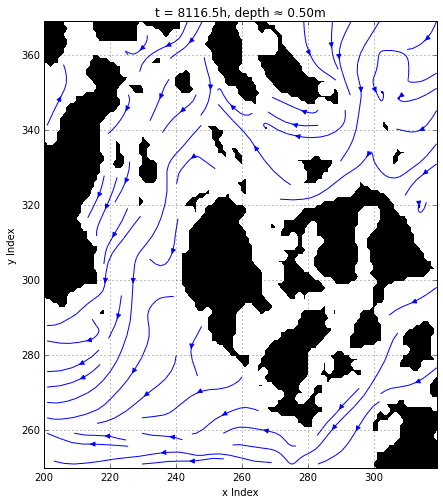

In [63]:
t, zlevel = 4, 0
y_slice = np.arange(250, 370)
x_slice = np.arange(200, 320)

ugrid_tzyx = np.ma.masked_values(ugrid[t, zlevel, y_slice, x_slice], 0)
vgrid_tzyx = np.ma.masked_values(vgrid[t, zlevel, y_slice, x_slice], 0)
u_tzyx, v_tzyx = viz_tools.unstagger(ugrid_tzyx, vgrid_tzyx)

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)

ax.streamplot(x_slice[1:], y_slice[1:], u_tzyx, v_tzyx)
viz_tools.plot_land_mask(ax, bathy, xslice=x_slice, yslice=y_slice)

ax.set_xlim(x_slice[0], x_slice[-1])
ax.set_ylim(y_slice[0], y_slice[-1])
ax.grid()

ax.set_xlabel('x Index')
ax.set_ylabel('y Index')
ax.set_title(u't = {t:.1f}h, depth \u2248 {d:.2f}{z.units}'.format(t=timesteps[t] / 3600, d=zlevels[zlevel], z=zlevels))

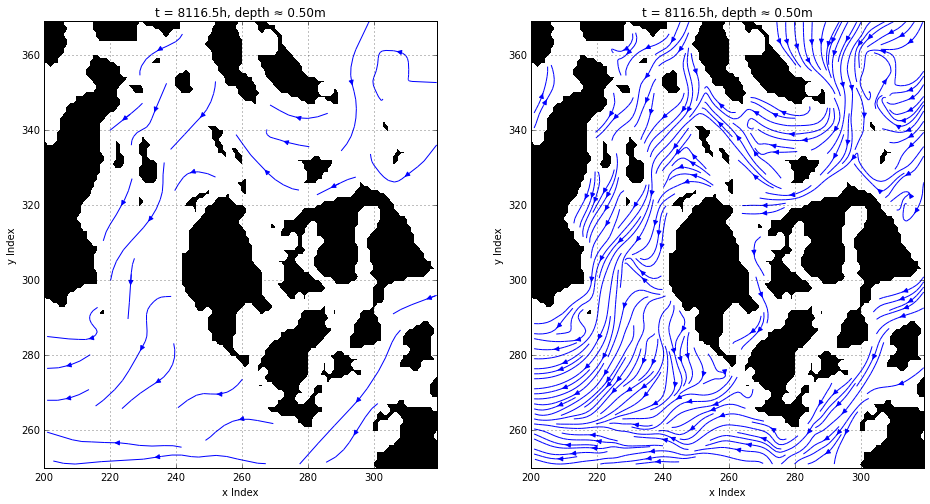

In [69]:
t, zlevel = 4, 0
y_slice = np.arange(250, 370)
x_slice = np.arange(200, 320)

ugrid_tzyx = np.ma.masked_values(ugrid[t, zlevel, y_slice, x_slice], 0)
vgrid_tzyx = np.ma.masked_values(vgrid[t, zlevel, y_slice, x_slice], 0)
u_tzyx, v_tzyx = viz_tools.unstagger(ugrid_tzyx, vgrid_tzyx)

fig, axs = plt.subplots(1, 2, figsize=(16, 8))
densities = (0.5, 3)
for ax, density in zip(axs, densities):
    viz_tools.set_aspect(ax)

    ax.streamplot(
        x_slice[1:], y_slice[1:], u_tzyx, v_tzyx,
        density=density,
    )
    viz_tools.plot_land_mask(ax, bathy, xslice=x_slice, yslice=y_slice)

    ax.set_xlim(x_slice[0], x_slice[-1])
    ax.set_ylim(y_slice[0], y_slice[-1])
    ax.grid()

    ax.set_xlabel('x Index')
    ax.set_ylabel('y Index')
    ax.set_title(u't = {t:.1f}h, depth \u2248 {d:.2f}{z.units}'.format(t=timesteps[t] / 3600, d=zlevels[zlevel], z=zlevels))


/home/alaw/anaconda/lib/python2.7/site-packages/numpy/ma/core.py:3900: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


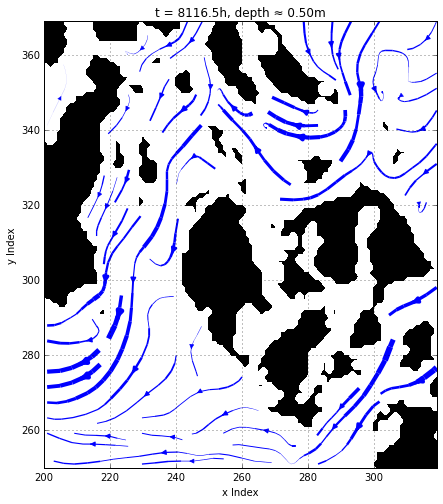

In [70]:
t, zlevel = 4, 0
y_slice = np.arange(250, 370)
x_slice = np.arange(200, 320)

ugrid_tzyx = np.ma.masked_values(ugrid[t, zlevel, y_slice, x_slice], 0)
vgrid_tzyx = np.ma.masked_values(vgrid[t, zlevel, y_slice, x_slice], 0)
u_tzyx, v_tzyx = viz_tools.unstagger(ugrid_tzyx, vgrid_tzyx)
speeds = np.sqrt(np.square(u_tzyx) + np.square(v_tzyx))
max_speed = viz_tools.calc_abs_max(speeds)

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)

ax.streamplot(
    x_slice[1:], y_slice[1:], u_tzyx, v_tzyx,
    linewidth=7*speeds/max_speed,
)
viz_tools.plot_land_mask(ax, bathy, xslice=x_slice, yslice=y_slice)

ax.set_xlim(x_slice[0], x_slice[-1])
ax.set_ylim(y_slice[0], y_slice[-1])
ax.grid()

ax.set_xlabel('x Index')
ax.set_ylabel('y Index')
ax.set_title(u't = {t:.1f}h, depth \u2248 {d:.2f}{z.units}'.format(t=timesteps[t] / 3600, d=zlevels[zlevel], z=zlevels))

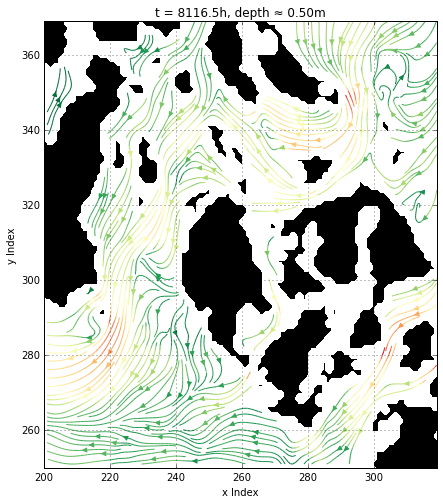

In [90]:
t, zlevel = 4, 0
y_slice = np.arange(250, 370)
x_slice = np.arange(200, 320)

ugrid_tzyx = np.ma.masked_values(ugrid[t, zlevel, y_slice, x_slice], 0)
vgrid_tzyx = np.ma.masked_values(vgrid[t, zlevel, y_slice, x_slice], 0)
u_tzyx, v_tzyx = viz_tools.unstagger(ugrid_tzyx, vgrid_tzyx)
speeds = np.sqrt(np.square(u_tzyx) + np.square(v_tzyx))
max_speed = viz_tools.calc_abs_max(speeds)

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax)

streams = ax.streamplot(
    x_slice[1:], y_slice[1:], u_tzyx, v_tzyx, density=3.5,
    color=speeds, cmap='RdYlGn_r')
viz_tools.plot_land_mask(ax, bathy, xslice=x_slice, yslice=y_slice)

ax.set_xlim(x_slice[0], x_slice[-1])
ax.set_ylim(y_slice[0], y_slice[-1])
ax.grid()

ax.set_xlabel('x Index')
ax.set_ylabel('y Index')
ax.set_title(u't = {t:.1f}h, depth \u2248 {d:.2f}{z.units}'.format(t=timesteps[t] / 3600, d=zlevels[zlevel], z=zlevels))
